In [39]:
import os

base_dir = 'Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with our training Eczema pictures
train_acne_dir = os.path.join(train_dir, 'acne')

# Directory with our training Melanoma pictures
train_atopic_dir = os.path.join(train_dir, 'atopic')

# Directory with our training Atopic_Dermatitis pictures
train_bcc_dir = os.path.join(train_dir, 'bcc')

# Directory with our test Eczema pictures
test_acne_dir = os.path.join(test_dir, 'acne')

# Directory with our test Melanoma pictures
test_atopic_dir = os.path.join(test_dir, 'atopic')

# Directory with our test Atopic_Dermatitis pictures
test_bcc_dir = os.path.join(test_dir, 'bcc')

# Directory with our validation Eczema pictures
validation_acne_dir = os.path.join(validation_dir, 'acne')

# Directory with our validation Melanoma pictures
validation_atopic_dir = os.path.join(validation_dir, 'atopic')

# Directory with our validation Atopic_Dermatitis pictures
validation_bcc_dir = os.path.join(validation_dir, 'bcc')


In [40]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

def count_images_in_directory(directory):
    return sum([len(files) for root, dirs, files in os.walk(directory)])

def count_images_per_class(directory):
    classes = os.listdir(directory)
    class_counts = {}

    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_count = count_images_in_directory(class_path)
            class_counts[class_name] = class_count

    return class_counts

# Directory paths
train_dir = 'Dataset/train'
validation_dir = 'Dataset/valid'
test_dir = 'Dataset/test'

# Count original images per class
train_class_counts = count_images_per_class(train_dir)
validation_class_counts = count_images_per_class(validation_dir)
test_class_counts = count_images_per_class(test_dir)

# Display the counts per class with class names
print("Number of original training images per class:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nNumber of original validation images per class:")
for class_name, count in validation_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nNumber of original test images per class:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")


Number of original training images per class:
acne: 1611 images
atopic: 1557 images
bcc: 1605 images

Number of original validation images per class:
acne: 72 images
atopic: 70 images
bcc: 68 images

Number of original test images per class:
acne: 68 images
atopic: 67 images
bcc: 70 images


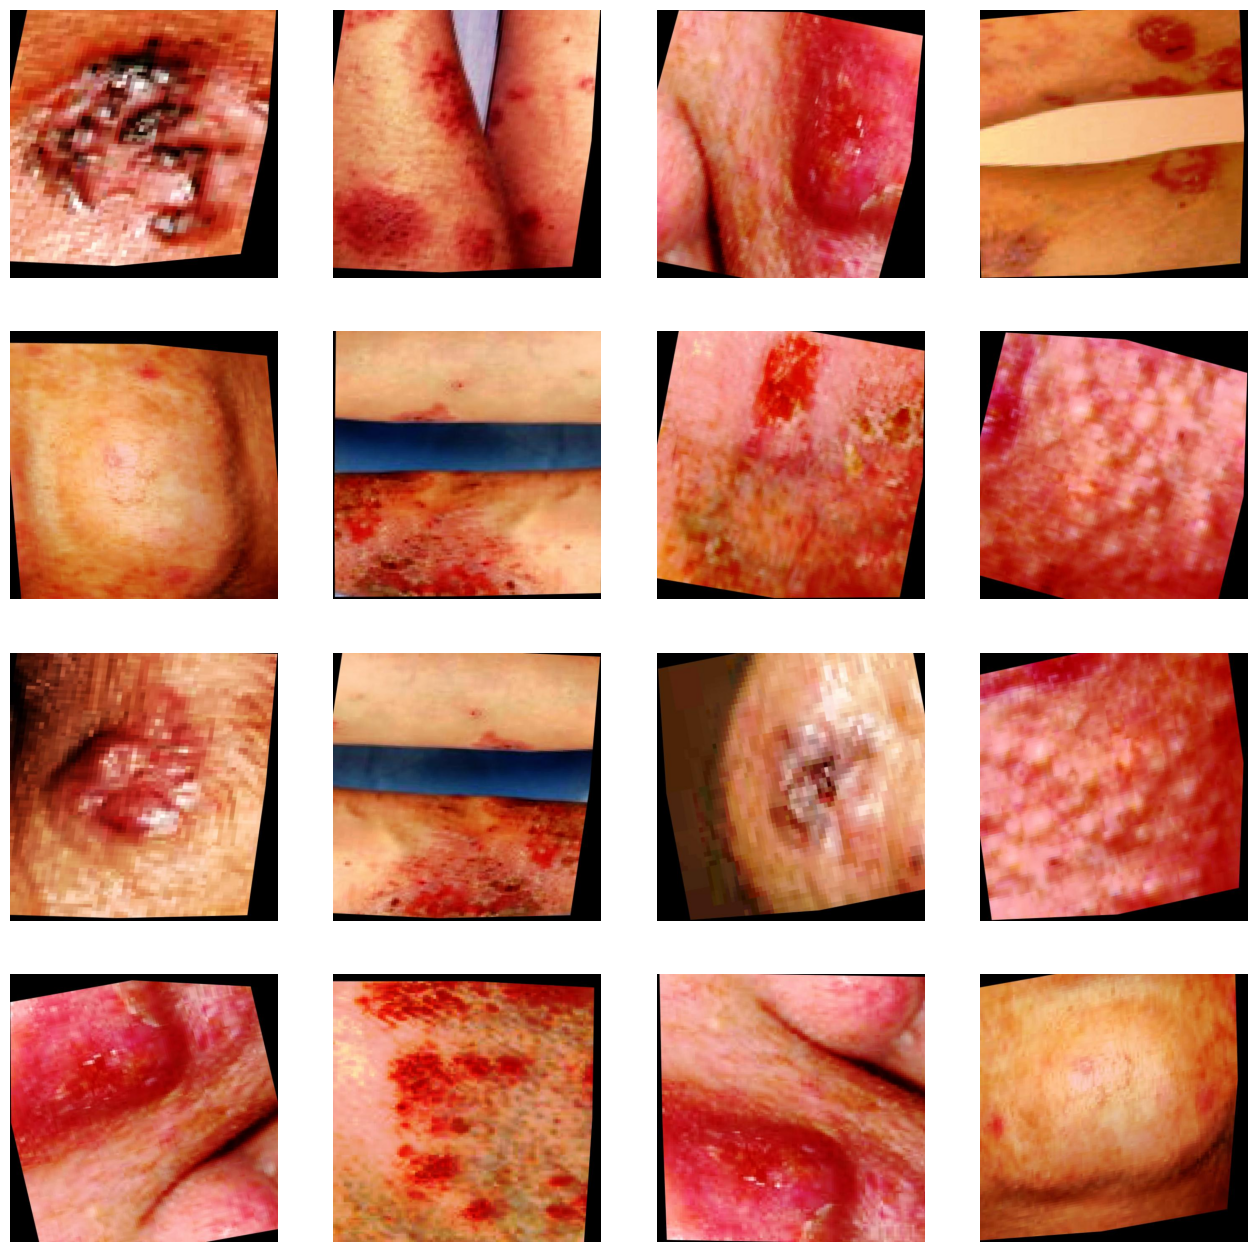

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Set up the number of rows and columns
nrows = 4
ncols = 4

# Set up the figure size
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# Choose a starting index for each class
pic_index_acne = random.randint(0, len(os.listdir(train_acne_dir)) - 8)
pic_index_atopic = random.randint(0, len(os.listdir(train_atopic_dir)) - 8)
pic_index_bcc = random.randint(0, len(os.listdir(train_bcc_dir)) - 8)

# Get file names for each class
train_acne_fnames = os.listdir(train_acne_dir)
train_atopic_fnames = os.listdir(train_atopic_dir)
train_bcc_fnames = os.listdir(train_bcc_dir)

# Combine the image paths
all_image_paths = (
    [os.path.join(train_acne_dir, fname) for fname in train_acne_fnames[pic_index_acne:pic_index_acne + 8]] +
    [os.path.join(train_atopic_dir, fname) for fname in train_atopic_fnames[pic_index_atopic:pic_index_atopic + 8]] +
    [os.path.join(train_bcc_dir, fname) for fname in train_bcc_fnames[pic_index_bcc:pic_index_bcc + 8]]
)

# Shuffle the image paths
random.shuffle(all_image_paths)

# Display only 16 images or fewer
for i, img_path in enumerate(all_image_paths[:16]):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2,  # Add height shift
    brightness_range=[0.4, 1.2],  # Adjust brightness
    fill_mode='nearest'
)


valid_datagen = ImageDataGenerator(rescale=1./255)   #Normalization

test_datagen = ImageDataGenerator(rescale=1./255)   #Normalization

# Training Set
train_set = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             batch_size=20,
                                             class_mode='categorical')

# Validation Set
valid_set = valid_datagen.flow_from_directory(validation_dir,
                                              target_size=(224, 224),
                                              batch_size=20,
                                              class_mode='categorical',
                                              shuffle=False)

# Test Set
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=20,
                                            class_mode='categorical',
                                            shuffle=False)

Found 4773 images belonging to 3 classes.
Found 210 images belonging to 3 classes.
Found 205 images belonging to 3 classes.


In [43]:
label_dict = train_set.class_indices
class_names = list(label_dict.keys())
images,labels=next(train_set)

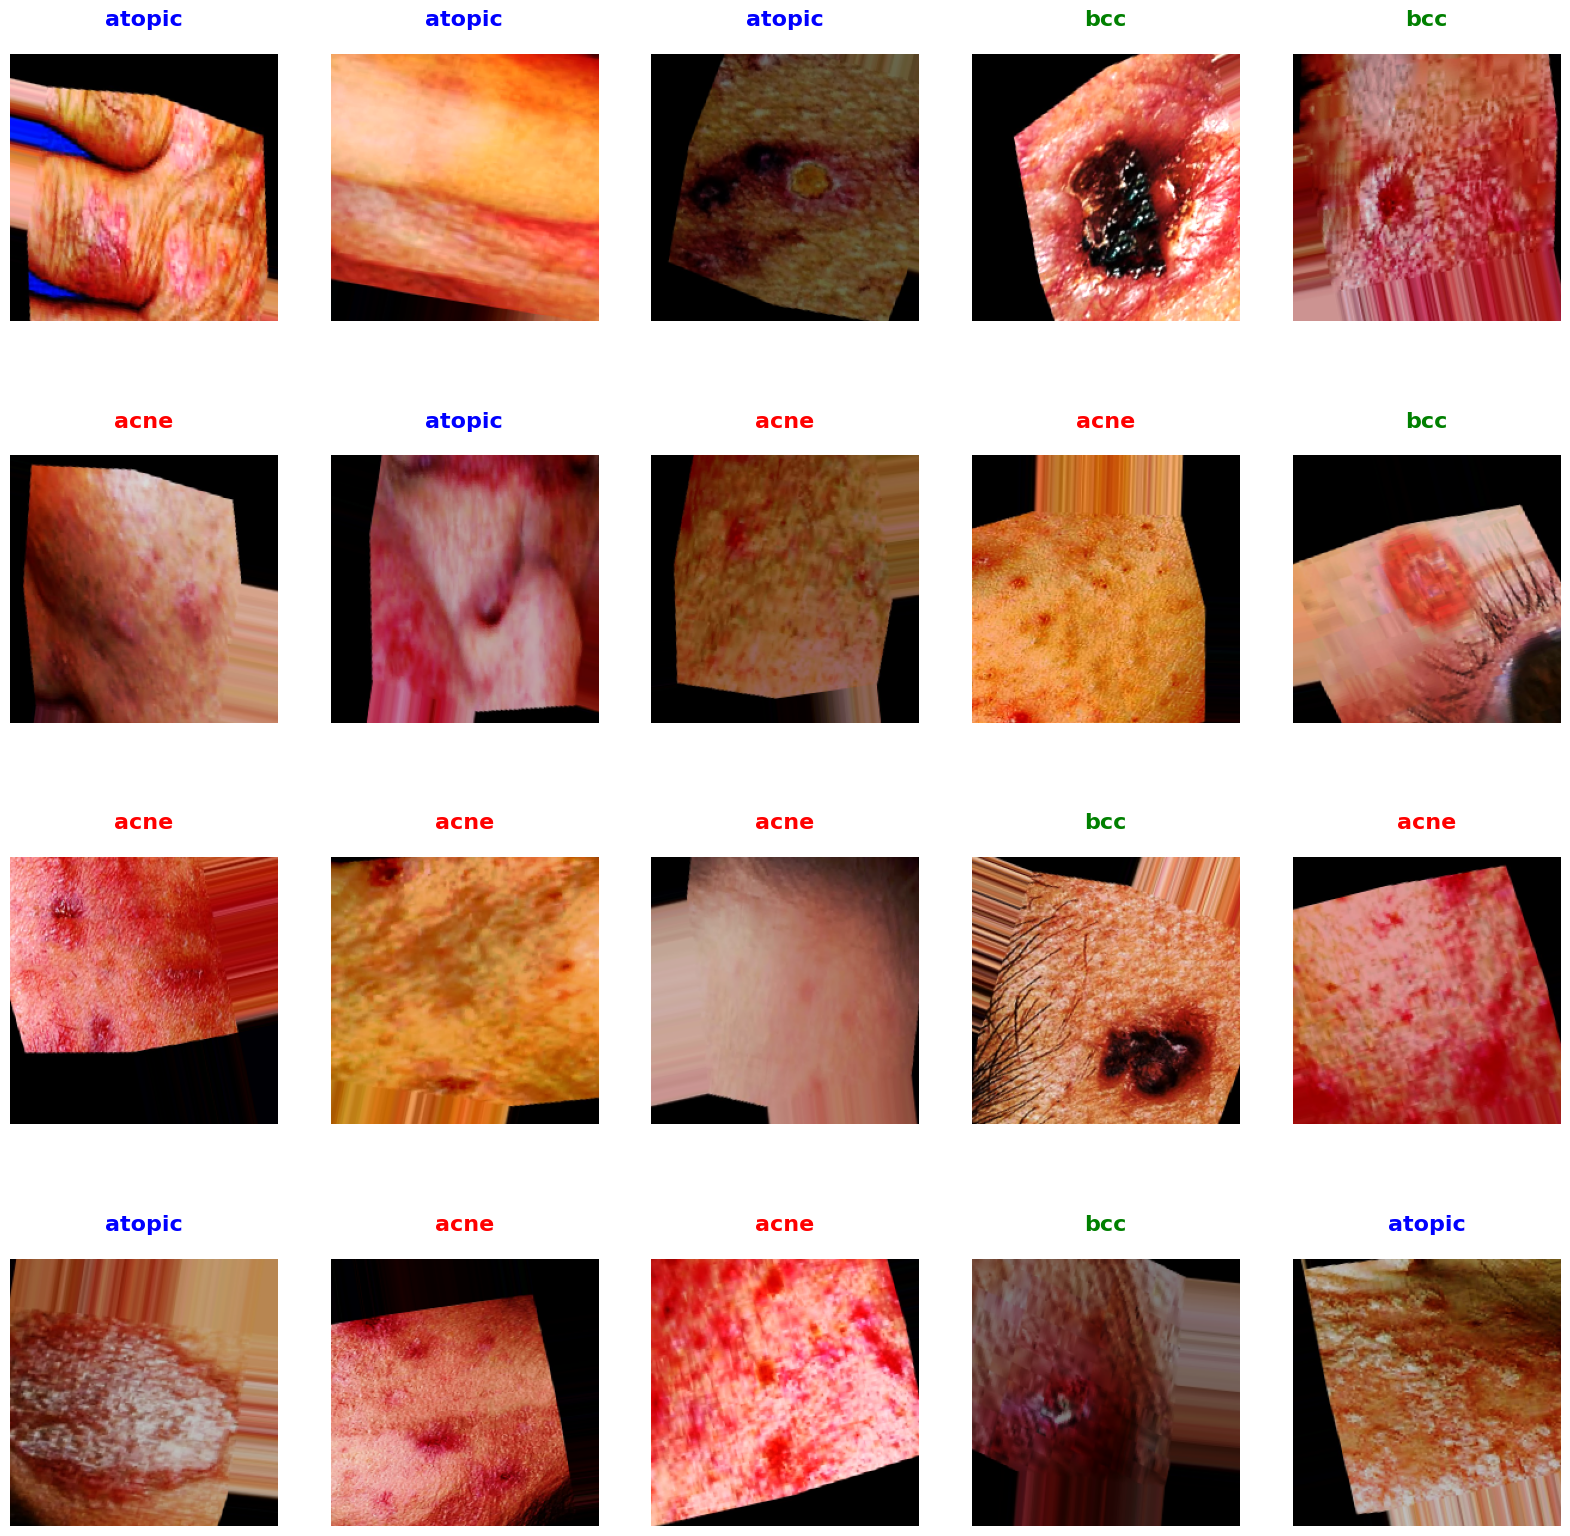

In [44]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
rcParams['axes.titlepad'] = 20

for i in range(20):
    plt.subplot(4, 5, i + 1)
    image = images[i]  # No normalization needed if already in range 0-1
    plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
    index = np.argmax(labels[i])
    class_name = class_names[index]
    color = 'green' if class_name == 'bcc' else ('red' if class_name == 'acne' else 'blue')
    plt.title(class_name, fontsize=16, fontweight='bold', color=color)
    plt.axis('off')

plt.show()



In [45]:
# Fixing the seed for random number generators
import random
from keras.backend import clear_session
import numpy as np
import tensorflow as tf

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [46]:
pip install efficientnet


In [47]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from efficientnet.tfkeras import EfficientNetB0  # Assuming you're using the EfficientNet from the TensorFlow Hub


effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))

model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(3, activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs=model)

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [48]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 32)         0         ['stem_bn[0][0]']       

In [49]:
tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("Skin__diseases_effnet_model.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_delta=0.001, mode='auto', verbose=1)

# Assuming you have X_train and y_train defined
history = model.fit(train_set, epochs=12, validation_data=valid_set, callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/12
239/239 [==============================] - ETA: 0s - loss: 0.6055 - accuracy: 0.7477
Epoch 1: val_accuracy improved from -inf to 0.76667, saving model to Skin__diseases_effnet_model.h5
239/239 [==============================] - 487s 2s/step - loss: 0.6055 - accuracy: 0.7477 - val_loss: 0.5171 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 2/12
239/239 [==============================] - ETA: 0s - loss: 0.4505 - accuracy: 0.8171
Epoch 2: val_accuracy improved from 0.76667 to 0.83333, saving model to Skin__diseases_effnet_model.h5
239/239 [==============================] - 399s 2s/step - loss: 0.4505 - accuracy: 0.8171 - val_loss: 0.3798 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 3/12
239/239 [==============================] - ETA: 0s - loss: 0.4036 - accuracy: 0.8477
Epoch 3: val_accuracy did not improve from 0.83333
239/239 [==============================] - 390s 2s/step - loss: 0.4036 - accuracy: 0.8477 - val_loss: 1.0647 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 4/12
239/239 [===

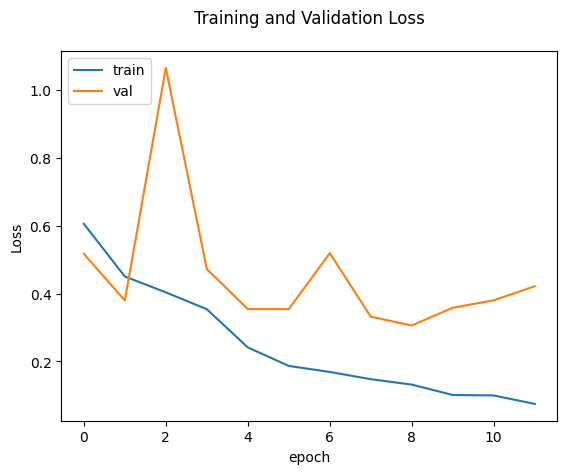

In [50]:
import keras
from matplotlib import pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

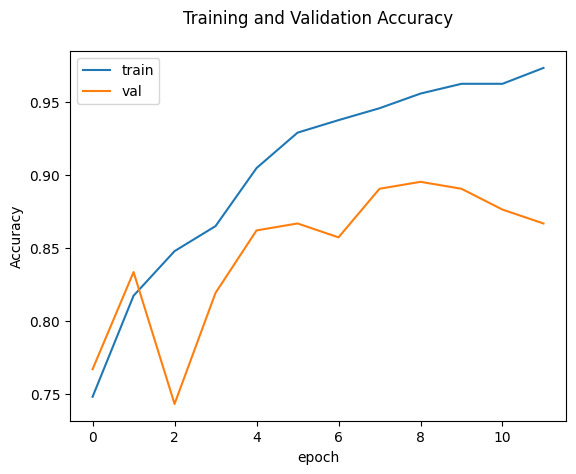

In [51]:
import keras
from matplotlib import pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Reset the test set generator
test_set.reset()

# Predict probabilities for the test set
y_pred_proba = model.predict(test_set)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Get the true labels from the test set
y_true = test_set.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Calculate precision
precision = precision_score(y_true, y_pred_classes, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


11/11 [==============================] - 6s 320ms/step
Test Accuracy: 0.8195121951219512
Precision: 0.8478169351675648
Recall: 0.8195121951219512
F1 Score: 0.8114445253857152


**Confusion Matrix of Test Set**

In [ ]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [54]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

**Missclassified Test Images**

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())


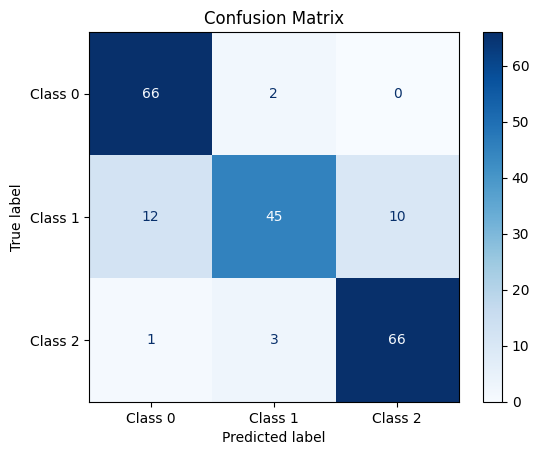

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Given confusion matrix values
confusion_matrix_values = np.array([[66, 2, 0],
                                    [12, 45, 10],
                                    [1, 3, 66]])

# Display labels for the classes
class_names = ["Class 0", "Class 1", "Class 2"]

# Create a ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_values, display_labels=class_names)

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Confusion Matrix of Train Set**

In [57]:
import pandas as pd
train_set.reset
ytrainhat = model.predict_generator(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})

C:\Users\Somna\AppData\Local\Temp\ipykernel_8124\1897391606.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytrainhat = model.predict_generator(train_set)


In [58]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2526 Training images : %d'%misclassified['y'].count())

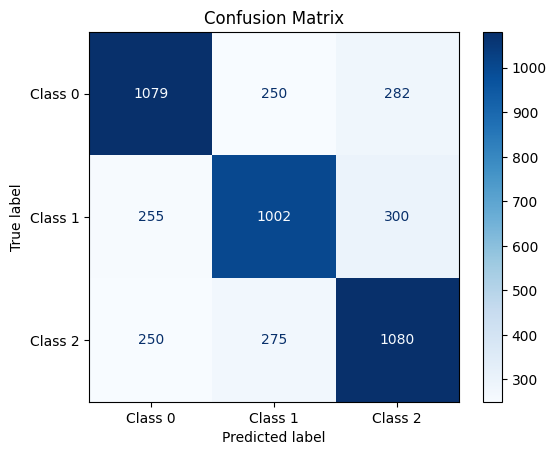

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Given confusion matrix values
confusion_matrix_values = np.array([[1079, 250, 282],
                                    [255, 1002, 300],
                                    [250, 275, 1080]])

# Display labels for the classes
class_names = ["Class 0", "Class 1", "Class 2"]

# Create a ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_values, display_labels=class_names)

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**confusion matrix of validation set**

In [61]:
import pandas as pd
valid_set.reset
yvalidhat = model.predict_generator(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})

C:\Users\Somna\AppData\Local\Temp\ipykernel_8124\4155108745.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yvalidhat = model.predict_generator(valid_set)


In [62]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

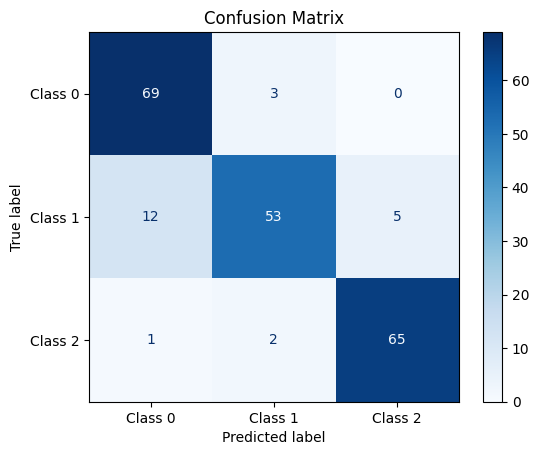

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Given confusion matrix values
confusion_matrix_values = np.array([[69, 3, 0],
                                    [12, 53, 5],
                                    [1, 2, 65]])

# Display labels for the classes
class_names = ["Class 0", "Class 1", "Class 2"]

# Create a ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_values, display_labels=class_names)

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Prediction**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_path = 'Dataset/test/bcc/basal-cell-carcinoma-lesion-49_jpg.rf.e0f6134fc01b2d2547926f7c7f819ba5.jpg'
img1 = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)  # create a batch of size 1 [N,H,W,C]

# Predict the image
prediction = model.predict(img, batch_size=None, steps=1)

# Define the class labels
class_labels = ['acne', 'atopic', 'bcc']

# Get the predicted class and its probability
predicted_class_index = np.argmax(prediction)
predicted_class = class_labels[predicted_class_index]
predicted_probability = prediction[0, predicted_class_index]

# Display the image with prediction information
plt.imshow(img1)
if predicted_probability > 0.5:
    plt.text(20, 62, f'Prediction: {predicted_class} ({predicted_probability:.2f})', color='red',
             fontsize=18, bbox=dict(facecolor='yellow', alpha=0.8))
else:
    plt.text(20, 62, f'Prediction: {predicted_class} ({1.0 - predicted_probability:.2f})', color='red',
             fontsize=18, bbox=dict(facecolor='yellow', alpha=0.8))

plt.show()


NameError: name 'model' is not defined